# 데이터 시각화

- pandas, matplolib, seaborn 등 다양한 라이브러리 활용
- 데이터를 시각적으로 표현하여 패턴, 이상치를 쉽게 파악
- 라이브러리 별 특징
  - pandas : 빠른 탐색, 간단한 시각화 처리
  - patplolib : 자유도가 높고, 세밀한 그래프 제작 가능
  - seaborn: 깔끔하고 직관적인 기본 시각화 스타일과 다양한 테마 적용

In [64]:
import pandas as pd
import matplotlib
#date_range(start,periods, freq) : 균등한 간격의 날짜시간 인덱스 생성 함수
# - start : 시작일
# - periods : 기간의 개수
# - freq : 날짜시간 간격의 주기. 기본 'D' : 하루

data = {
  "date" : pd.date_range(start='2025-11-15', periods=10, freq='D'),
  "temperature" : [18,19,10,7,9,15,13,15,16,17],
  "humidity" : [60,62,55,57,60,61,59,58,60,58] 
}

df = pd.DataFrame(data)

df = df.set_index(["date"])

<Axes: title={'center': 'Daily Temperature'}, xlabel='date', ylabel='Temperature'>

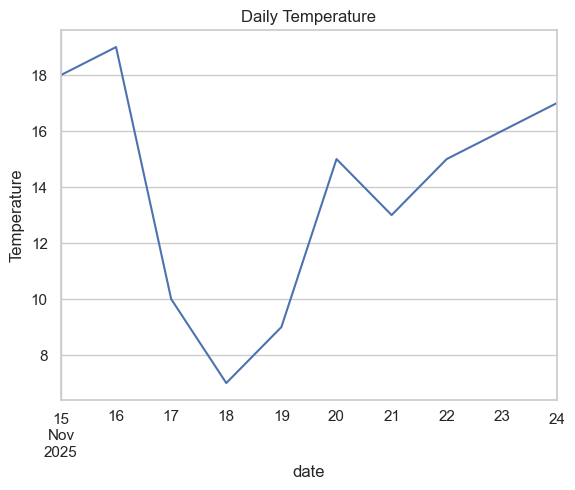

In [65]:
# pandas plot
# * plot() : DataFrame/Series 를 바로 시각화 해주는 함수
# - kind : 그래프 종류. 'line', 'bar', 'box', 'pie' etc...
# - title : 그래프 제목
# - xlabel : x축 라벨, ylabel : y축 라벨

# 기온(temperature) 데이터를 시각화
df['temperature'].plot(title='Daily Temperature', ylabel='Temperature')

# => matplotlib 모듈 설치
# > pip install matplotlib

<Axes: title={'center': 'Temperature with 3-day'}, xlabel='date', ylabel='T'>

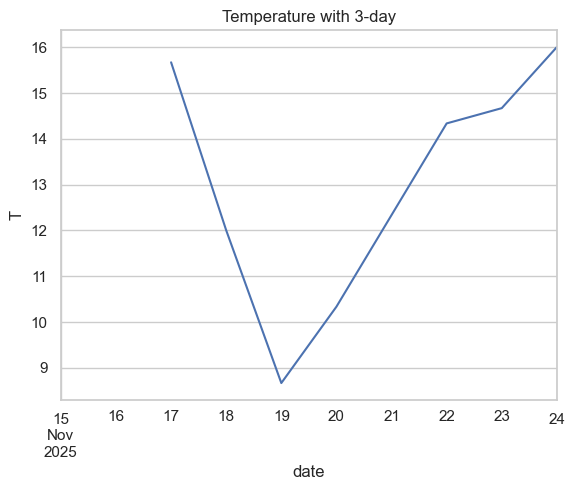

In [66]:
# 3일 이동 평균 시각화
df['temperature'].rolling(3).mean().plot(title='Temperature with 3-day', ylabel="T")

<Axes: title={'center': 'Temperature & Humidty'}, xlabel='date'>

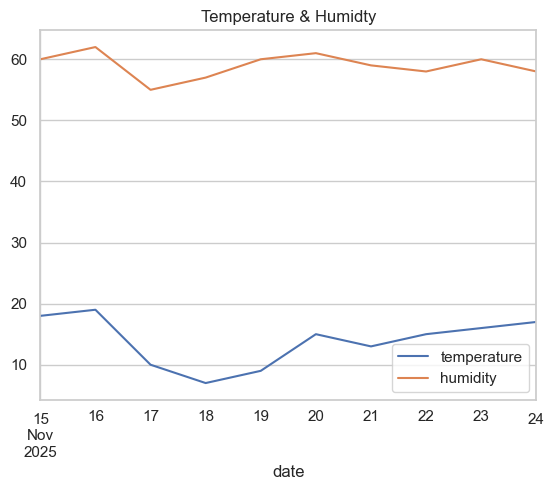

In [67]:
# 여러 컬럼 시각화
df[['temperature', 'humidity']].plot(title='Temperature & Humidty')

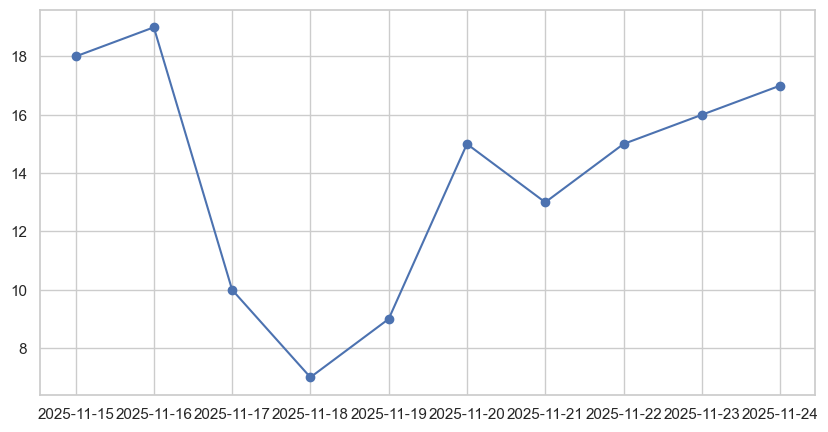

In [68]:
# matplotlib
# - 자유도가 높고, 세밀한 커스터마이징 가능
# - 코드가 길고, 처음 다루기에는 복잡할 수 있음
# import

import matplotlib.pyplot as plt

# figure : 도화지
plt.figure(figsize=(10,5))  # 가로 10, 세로 5 크기 지정하여 figure 생성

plt.plot(df.index,                # x축 데이터 (날짜)
         df['temperature'],       # y축 데이터 (온도)
         marker='o',              # 데이터 포인트 표시 모양('o' - 원모양)
         label='Temperature'      # 범례
         )

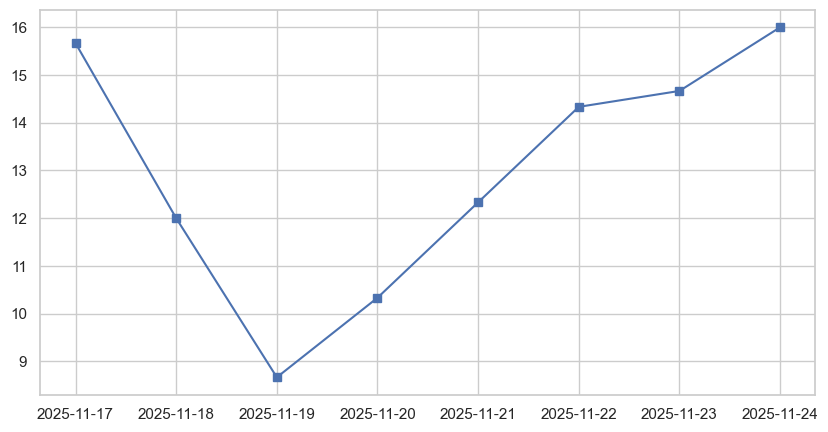

In [69]:
# 3일 이동평균 그래프 표시
plt.figure(figsize=(10, 5))

plt.plot(df.index,
         df['temperature'].rolling(3).mean(),
         marker='s',                        #포인트 모양 ('s' = 사각형)
         label='3-day MA')



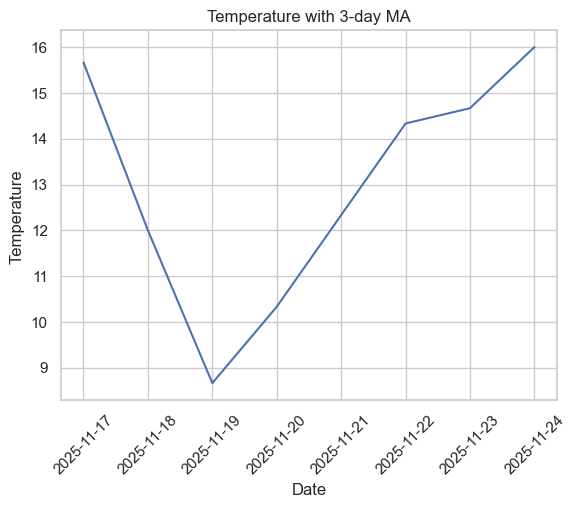

In [70]:
# 그래프 옵션 각각 설정하기

plt.plot(df.index, df['temperature'].rolling(3).mean()) # x축, y축 데이터
plt.title('Temperature with 3-day MA')  # 그래프 제목
plt.xlabel('Date')  # x축 라벨
plt.ylabel('Temperature ') # y축 라벨
plt.xticks(rotation=45) # x축 눈금 라벨 회전
plt.grid(True)  #격자 표시


(array([20407., 20408., 20409., 20410., 20411., 20412., 20413., 20414.,
        20415., 20416.]),
 [Text(20407.0, 0, '2025-11-15'),
  Text(20408.0, 0, '2025-11-16'),
  Text(20409.0, 0, '2025-11-17'),
  Text(20410.0, 0, '2025-11-18'),
  Text(20411.0, 0, '2025-11-19'),
  Text(20412.0, 0, '2025-11-20'),
  Text(20413.0, 0, '2025-11-21'),
  Text(20414.0, 0, '2025-11-22'),
  Text(20415.0, 0, '2025-11-23'),
  Text(20416.0, 0, '2025-11-24')])

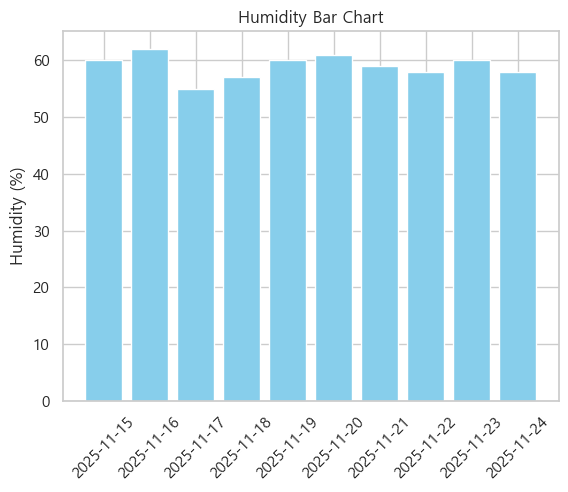

In [71]:
# 막대 그래프
# 폰트 설정 -> 한글 표시
plt.rc('font', family='Malgun Gothic')

plt.bar(
  df.index,   # x축 데이터 (날짜)
  df['humidity'], # y축 데이터 (습도)
  color='skyblue'  # 막대 색상
)
plt.title('Humidity Bar Chart')
plt.ylabel('Humidity (%)')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Temperature Line Chart')

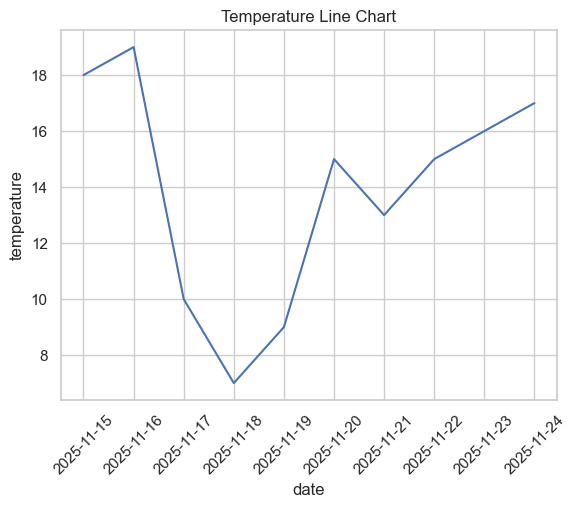

In [72]:
# seaborn
# - 통계적 시각화에 최적화되어 있는 라이브러리
# - 스타일 자동 적용 가능(테마)
# - 단, 세밀한 설정(커스터 마이징)은 matplotlib을 활용한

# > pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
# 스타일 설정
sns.set_theme(style='whitegrid')

sns.lineplot(x=df.index, y=df['temperature'])
plt.xticks(rotation=45)
plt.title('Temperature Line Chart')

<Axes: xlabel='Subject', ylabel='Score'>

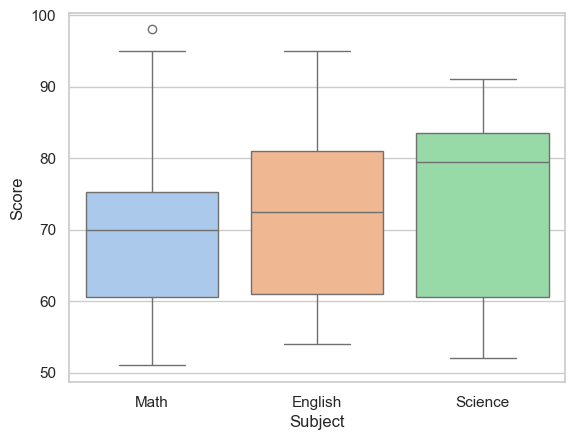

In [73]:
'''
    * 박스 플롯 (Boxplots)
      : 데이터의 분포와 이상치를 한눈에 보여주는 그래프 
      : 중앙값, 사분위수, 최소/최대값, 이상치를 시각적으로 확인
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_box = pd.DataFrame(
  {
    "Math" : np.random.randint(50, 100, 20).tolist(),
    "English": np.random.randint(50, 100, 20).tolist(),
    "Science" : np.random.randint(50, 100, 20).tolist(),
  }
)

# wide 형식의 데이터를 long 형식으로 변환 => melt()
# - 각 컬럼의 값이 행 단위로 쌓이고, 변수 이름과 값이 각각 컬럼으로 만들어진
df_box = df_box.melt(var_name='Subject', value_name='Score')

# melt(var_name, value_name)
# - var_name : 새로 만들어질 '변수 이름' 컬럼명
# - value_name : 새로 만들어질 '값' 컬럼명
sns.boxplot(data=df_box, x='Subject', y='Score', palette='pastel', hue='Subject')

<Axes: >

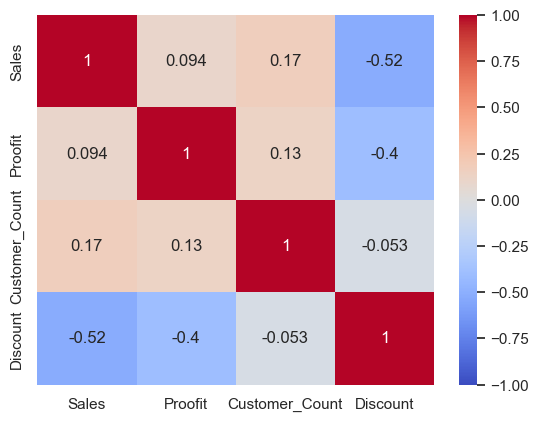

In [74]:
'''
    * 히트맵 (Heatmap)
      : 값의 크기를 색상으로 표현하는 2차원 그래프
      : 상관관계를 시각화
'''

df_heat = pd.DataFrame({
  "Sales" : np.random.randint(100, 500, 15),
  "Proofit" : np.random.randint(20, 150, 15),
  "Customer_Count" : np.random.randint(20, 200, 15),
  "Discount" : np.random.randint(0, 50, 15),
})

# * 컬럼 간 상관계수 계산 => corr()
# - 상관계수 : 두 변수 사이의 관계를 숫자로 나타낸 것
# - 값 범위 : -1 ~ 1 (1:양의 상관, -1: 음의 상관, 0: 상관 없음)

df_heat = df_heat.corr()
# df_heat

sns.heatmap(data=df_heat, cmap='coolwarm', vmin=-1, vmax=1, annot=True)